In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [74]:
import keras.backend.tensorflow_backend as Keras_GPU

def get_session():
    device_count = {'CPU':1,'GPU':0}
    return tf.Session(config=tf.ConfigProto(device_count = {'CPU' : 1,'GPU' : 0}))
Keras_GPU.set_session(get_session())

In [75]:
tf.reset_default_graph()

In [76]:
def MinMaxScaler(data):
    denom=np.max(data,0)-np.min(data,0)
    nume=data-np.min(data,0)
    return nume/denom    
    #정규화

In [77]:
xy = np.loadtxt(r"Q:\Python_Data\dataset\data-02-stock_daily.csv", delimiter=",")


In [78]:
xy=xy[::-1] #역순으로 저장

In [79]:
# d=np.array([1,2,3,4])
# d[::-1]

In [80]:
seqLength=64 #window size
dataDim=5 #시가,종가,...거래량 5개 컬럼
hiddenDim=10
outputDim=1
lr=0.01
iterations=500

In [81]:
trainSize=int(len(xy)*0.7)
trainSet=xy[0:trainSize] #0:499
testSet=xy[trainSize-seqLength:]#493:499->500

In [82]:
trainSet=MinMaxScaler(trainSet)
testSet=MinMaxScaler(testSet)

In [83]:
def buildDataSet(timeSeries, seqLength):
    xdata=[]
    ydata=[]
    for i in range(0, len(timeSeries)-seqLength):
        tx=timeSeries[i:i+seqLength,:]
        ty=timeSeries[i+seqLength,[-1]]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)
    

In [84]:
trainX, trainY=buildDataSet(trainSet, seqLength)
testX, testY=buildDataSet(testSet, seqLength)

In [85]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(448, 64, 5) (448, 1)
(220, 64, 5) (220, 1)


In [62]:
tf.__version__

'1.15.0'

In [63]:
trainY.shape

(448, 1)

In [64]:
trainX.shape #(505,7,5)
#505개 샘플, 7(일주일), 5(5개 컬럼)
testX.shape #(220, 7, 5)

(220, 64, 5)

In [65]:
x=tf.placeholder(tf.float32, [None, seqLength, dataDim])
y=tf.placeholder(tf.float32, [None, 1])

In [66]:
cell=tf.contrib.rnn.BasicLSTMCell(
    num_units=hiddenDim, 
    state_is_tuple=True,
    activation=tf.tanh
    #([1,2],[3,4])
    #is_Tuple=True => 튜플 = ([1,2],[3,4])
    #         False => 텐서 = [1,2,3,4]
)

In [67]:
outputs, _states=tf.nn.dynamic_rnn(cell, x, dtype=tf.float32)
yhat=tf.contrib.layers.fully_connected(outputs[:,-1], outputDim, activation_fn=None)


In [68]:
loss= tf.reduce_mean(tf.square(yhat-y))
opt=tf.train.AdamOptimizer(lr)
train=opt.minimize(loss)

In [69]:
#rmse
targets=tf.placeholder(tf.float32, [None,1])
predictions=tf.placeholder(tf.float32, [None,1])
rmse=tf.sqrt(tf.reduce_mean(tf.square(targets-predictions)))

In [70]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _,cv=sess.run([train, loss], feed_dict={
            x:trainX, y:trainY
        })
        print("step:{} loss:{}".format(i, cv))
    testPredict=sess.run(yhat, feed_dict={x:testX})
    rmsev=sess.run(rmse, feed_dict={
        targets:testY,
        predictions:testPredict
    })
    print("rmse value: {}".format(rmsev))
    
        

step:0 loss:1.0409780740737915
step:1 loss:0.6824336051940918
step:2 loss:0.4242350459098816
step:3 loss:0.25358501076698303
step:4 loss:0.15011286735534668
step:5 loss:0.09478745609521866
step:6 loss:0.07196220010519028
step:7 loss:0.06861818581819534
step:8 loss:0.074301578104496
step:9 loss:0.08132778853178024
step:10 loss:0.084987111389637
step:11 loss:0.08340810239315033
step:12 loss:0.07684952765703201
step:13 loss:0.06676340848207474
step:14 loss:0.05497485771775246
step:15 loss:0.04312865063548088
step:16 loss:0.03242873400449753
step:17 loss:0.02359861508011818
step:18 loss:0.016954844817519188
step:19 loss:0.012512036599218845
step:20 loss:0.010075153782963753
step:21 loss:0.009304605424404144
step:22 loss:0.009760044515132904
step:23 loss:0.01093804370611906
step:24 loss:0.012321485206484795
step:25 loss:0.013449099846184254
step:26 loss:0.013989712111651897
step:27 loss:0.01378964725881815
step:28 loss:0.012874231673777103
step:29 loss:0.011409920640289783
step:30 loss:0.00

step:237 loss:0.0025499125476926565
step:238 loss:0.002546137198805809
step:239 loss:0.00254237512126565
step:240 loss:0.0025386244524270296
step:241 loss:0.0025348872877657413
step:242 loss:0.0025311626959592104
step:243 loss:0.0025274506770074368
step:244 loss:0.002523750299587846
step:245 loss:0.002520062495023012
step:246 loss:0.002516387263312936
step:247 loss:0.002512724604457617
step:248 loss:0.002509073819965124
step:249 loss:0.002505434211343527
step:250 loss:0.0025018081068992615
step:251 loss:0.002498193411156535
step:252 loss:0.0024945903569459915
step:253 loss:0.0024909996427595615
step:254 loss:0.002487420802935958
step:255 loss:0.0024838538374751806
step:256 loss:0.0024802980478852987
step:257 loss:0.002476754365488887
step:258 loss:0.002473222790285945
step:259 loss:0.002469701925292611
step:260 loss:0.00246619270183146
step:261 loss:0.002462694887071848
step:262 loss:0.002459209179505706
step:263 loss:0.002455733949318528
step:264 loss:0.002452270360663533
step:265 los

step:469 loss:0.0019114704336971045
step:470 loss:0.001909429905936122
step:471 loss:0.0019073940347880125
step:472 loss:0.001905362238176167
step:473 loss:0.001903335563838482
step:474 loss:0.001901313429698348
step:475 loss:0.001899296185001731
step:476 loss:0.0018972838297486305
step:477 loss:0.0018952753162011504
step:478 loss:0.0018932718085125089
step:479 loss:0.001891273190267384
step:480 loss:0.0018892791122198105
step:481 loss:0.0018872898072004318
step:482 loss:0.0018853051587939262
step:483 loss:0.0018833255162462592
step:484 loss:0.0018813497154042125
step:485 loss:0.001879379153251648
step:486 loss:0.0018774131312966347
step:487 loss:0.001875451416708529
step:488 loss:0.0018734948243945837
step:489 loss:0.0018715428886935115
step:490 loss:0.0018695957260206342
step:491 loss:0.0018676528707146645
step:492 loss:0.0018657147884368896
step:493 loss:0.001863781944848597
step:494 loss:0.001861852710135281
step:495 loss:0.0018599292961880565
step:496 loss:0.0018580099567770958
st

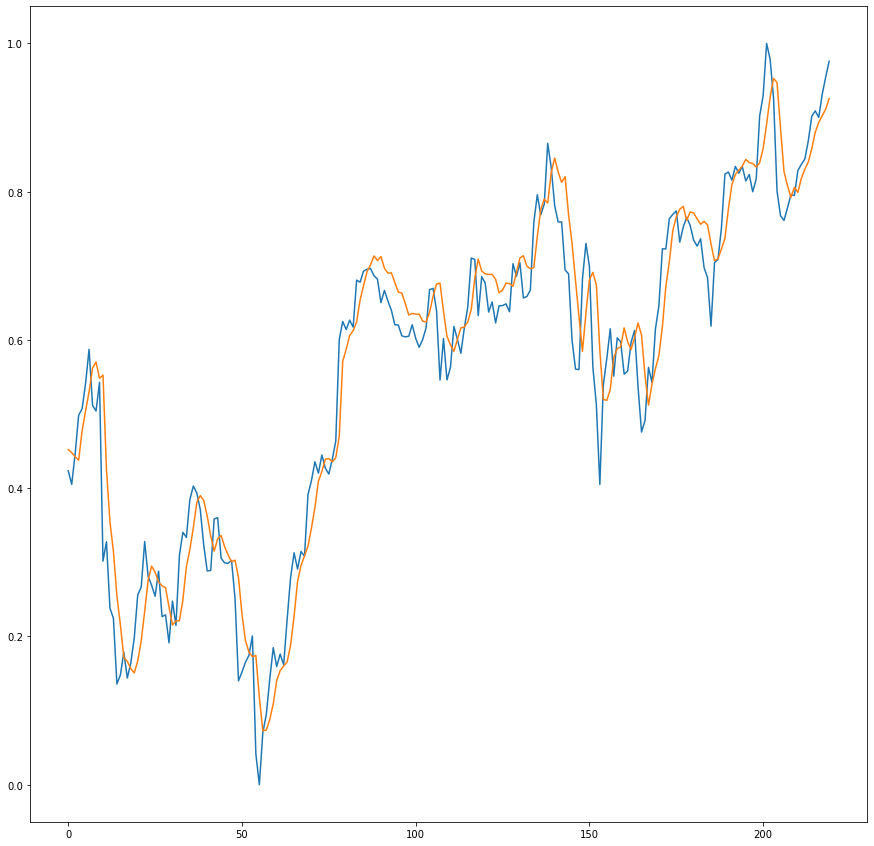

In [71]:
plt.figure(figsize=(15,15))
plt.plot(testY)
plt.plot(testPredict)
plt.show()

ValueError: Invalid RGBA argument: ''

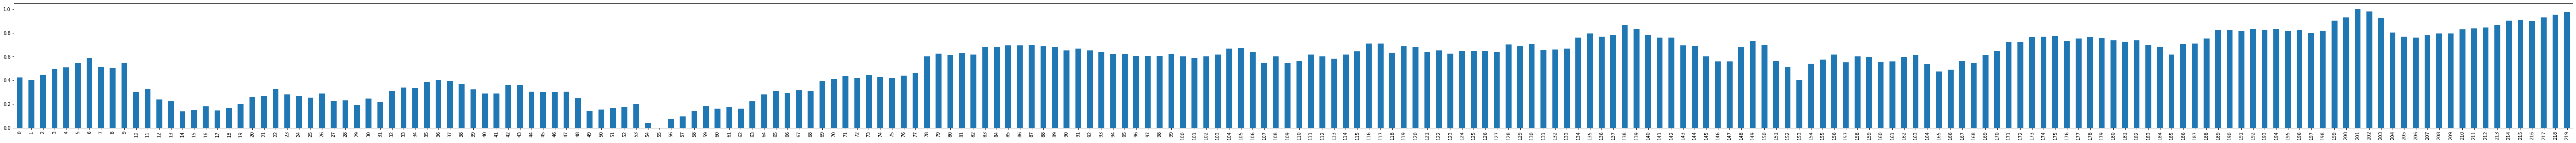

In [72]:
# pd.Series(testY.reshape(1,-1)[0]).plot(kind='bar', figsize=(15,15))


plt.figure(figsize=(100,5))
pd.Series(testY.reshape(1,-1)[0]).plot(kind='bar')
pd.Series(testPredict.reshape(1,-1)[0]).plot( kind='bar', color='')
r